# ***Import libraries***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML4

/content/drive/MyDrive/ML4


In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# seed = 42

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
seed = 42

# ***Load Bank Personal Loan Modelling dataset & explore***

- Dữ liệu được lấy từ Statlog (German Credit Data) Data Set https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29
- mỗi người được biểu diễn bằng 24 thuộc tính
- Nhãn 1: là người đó có tín dụng tốt
- Nhãn 0: là người đó có tín dụng xấu
- Ma trận chi phí (cost matrix): Chi phí khi đánh giá sai tín dụng xấu thành tốt (5) cao hơn khi đánh giá sai tín dụng tốt thành xấu (1)

In [4]:
# cost_matrix = np.array([[0, 5], [1, 0]])
# print('Nếu tín dụng xấu được phân là xấu, chi phí:', cost_matrix[0][0])
# print('Nếu tín dụng xấu được phân là tốt, chi phí:', cost_matrix[0][1])
# print('Nếu tín dụng tốt được phân là xấu, chi phí:', cost_matrix[1][0])
# print('Nếu tín dụng tốt được phân là tốt, chi phí:', cost_matrix[1][1])

cost_matrix  =np.array([[0, 5], [1, 0]])
print('Nếu tín dụng xấu được phân là xấu, chi phí:', cost_matrix[0][0])
print('Nếu tín dụng xấu được phân là tốt, chi phí:', cost_matrix[0][1])
print('Nếu tín dụng tốt được phân là xấu, chi phí:', cost_matrix[1][0])
print('Nếu tín dụng tốt được phân là tốt, chi phí:', cost_matrix[1][1])


Nếu tín dụng xấu được phân là xấu, chi phí: 0
Nếu tín dụng xấu được phân là tốt, chi phí: 5
Nếu tín dụng tốt được phân là xấu, chi phí: 1
Nếu tín dụng tốt được phân là tốt, chi phí: 0


In [5]:
data_array = np.genfromtxt('german.data-numeric')
data_frame = df = pd.DataFrame(data_array, columns=['A'+str(i) for i in range(1, 25)]+['label'])
# ban đầu nhãn là 1: good, 2: bad
# để đơn giản ta chuyển về 1: good, 0: bad
data_frame['label'] = data_frame['label'].replace(2, 0)
data_frame


data_array = np.genfromtxt('german.data-numeric')
data_frame = df = pd.DataFrame(data_array, columns=['A'+str(i) for i in range(1,25)]+['label'])
data_frame['label'] = data_frame['label'].replace(2, 0)
data_frame

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
0,1.0,6.0,4.0,12.0,5.0,5.0,3.0,4.0,1.0,67.0,3.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,2.0,48.0,2.0,60.0,1.0,3.0,2.0,2.0,1.0,22.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4.0,12.0,4.0,21.0,1.0,4.0,3.0,3.0,1.0,49.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,42.0,2.0,79.0,1.0,4.0,3.0,4.0,2.0,45.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,24.0,3.0,49.0,1.0,3.0,3.0,4.0,4.0,53.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,12.0,2.0,17.0,1.0,4.0,2.0,4.0,1.0,31.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
996,1.0,30.0,2.0,39.0,1.0,3.0,1.0,4.0,2.0,40.0,3.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,4.0,12.0,2.0,8.0,1.0,5.0,3.0,4.0,3.0,38.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
998,1.0,45.0,2.0,18.0,1.0,3.0,3.0,4.0,4.0,23.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# data_frame.info()

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      1000 non-null   float64
 1   A2      1000 non-null   float64
 2   A3      1000 non-null   float64
 3   A4      1000 non-null   float64
 4   A5      1000 non-null   float64
 5   A6      1000 non-null   float64
 6   A7      1000 non-null   float64
 7   A8      1000 non-null   float64
 8   A9      1000 non-null   float64
 9   A10     1000 non-null   float64
 10  A11     1000 non-null   float64
 11  A12     1000 non-null   float64
 12  A13     1000 non-null   float64
 13  A14     1000 non-null   float64
 14  A15     1000 non-null   float64
 15  A16     1000 non-null   float64
 16  A17     1000 non-null   float64
 17  A18     1000 non-null   float64
 18  A19     1000 non-null   float64
 19  A20     1000 non-null   float64
 20  A21     1000 non-null   float64
 21  A22     1000 non-null   float64
 22  A

In [ ]:
# data_frame.describe()

data_frame.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,label
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,32.711000,2.105000,3.384000,2.68200,2.845000,2.358000,35.546000,2.675000,1.407000,1.155000,1.404000,1.037000,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000,0.700000
std,1.257638,12.058814,1.08312,28.252605,1.580023,1.208306,0.70808,1.103718,1.050209,11.375469,0.705601,0.577654,0.362086,0.490943,0.188856,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046,0.458487
min,1.000000,4.000000,0.00000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,1.000000,12.000000,2.00000,14.000000,1.000000,3.000000,2.00000,2.000000,1.000000,27.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,2.000000,18.000000,2.00000,23.000000,1.000000,3.000000,3.00000,3.000000,2.000000,33.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,40.000000,3.000000,5.000000,3.00000,4.000000,3.000000,42.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000
max,4.000000,72.000000,4.00000,184.000000,5.000000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


# ***Data visualization***

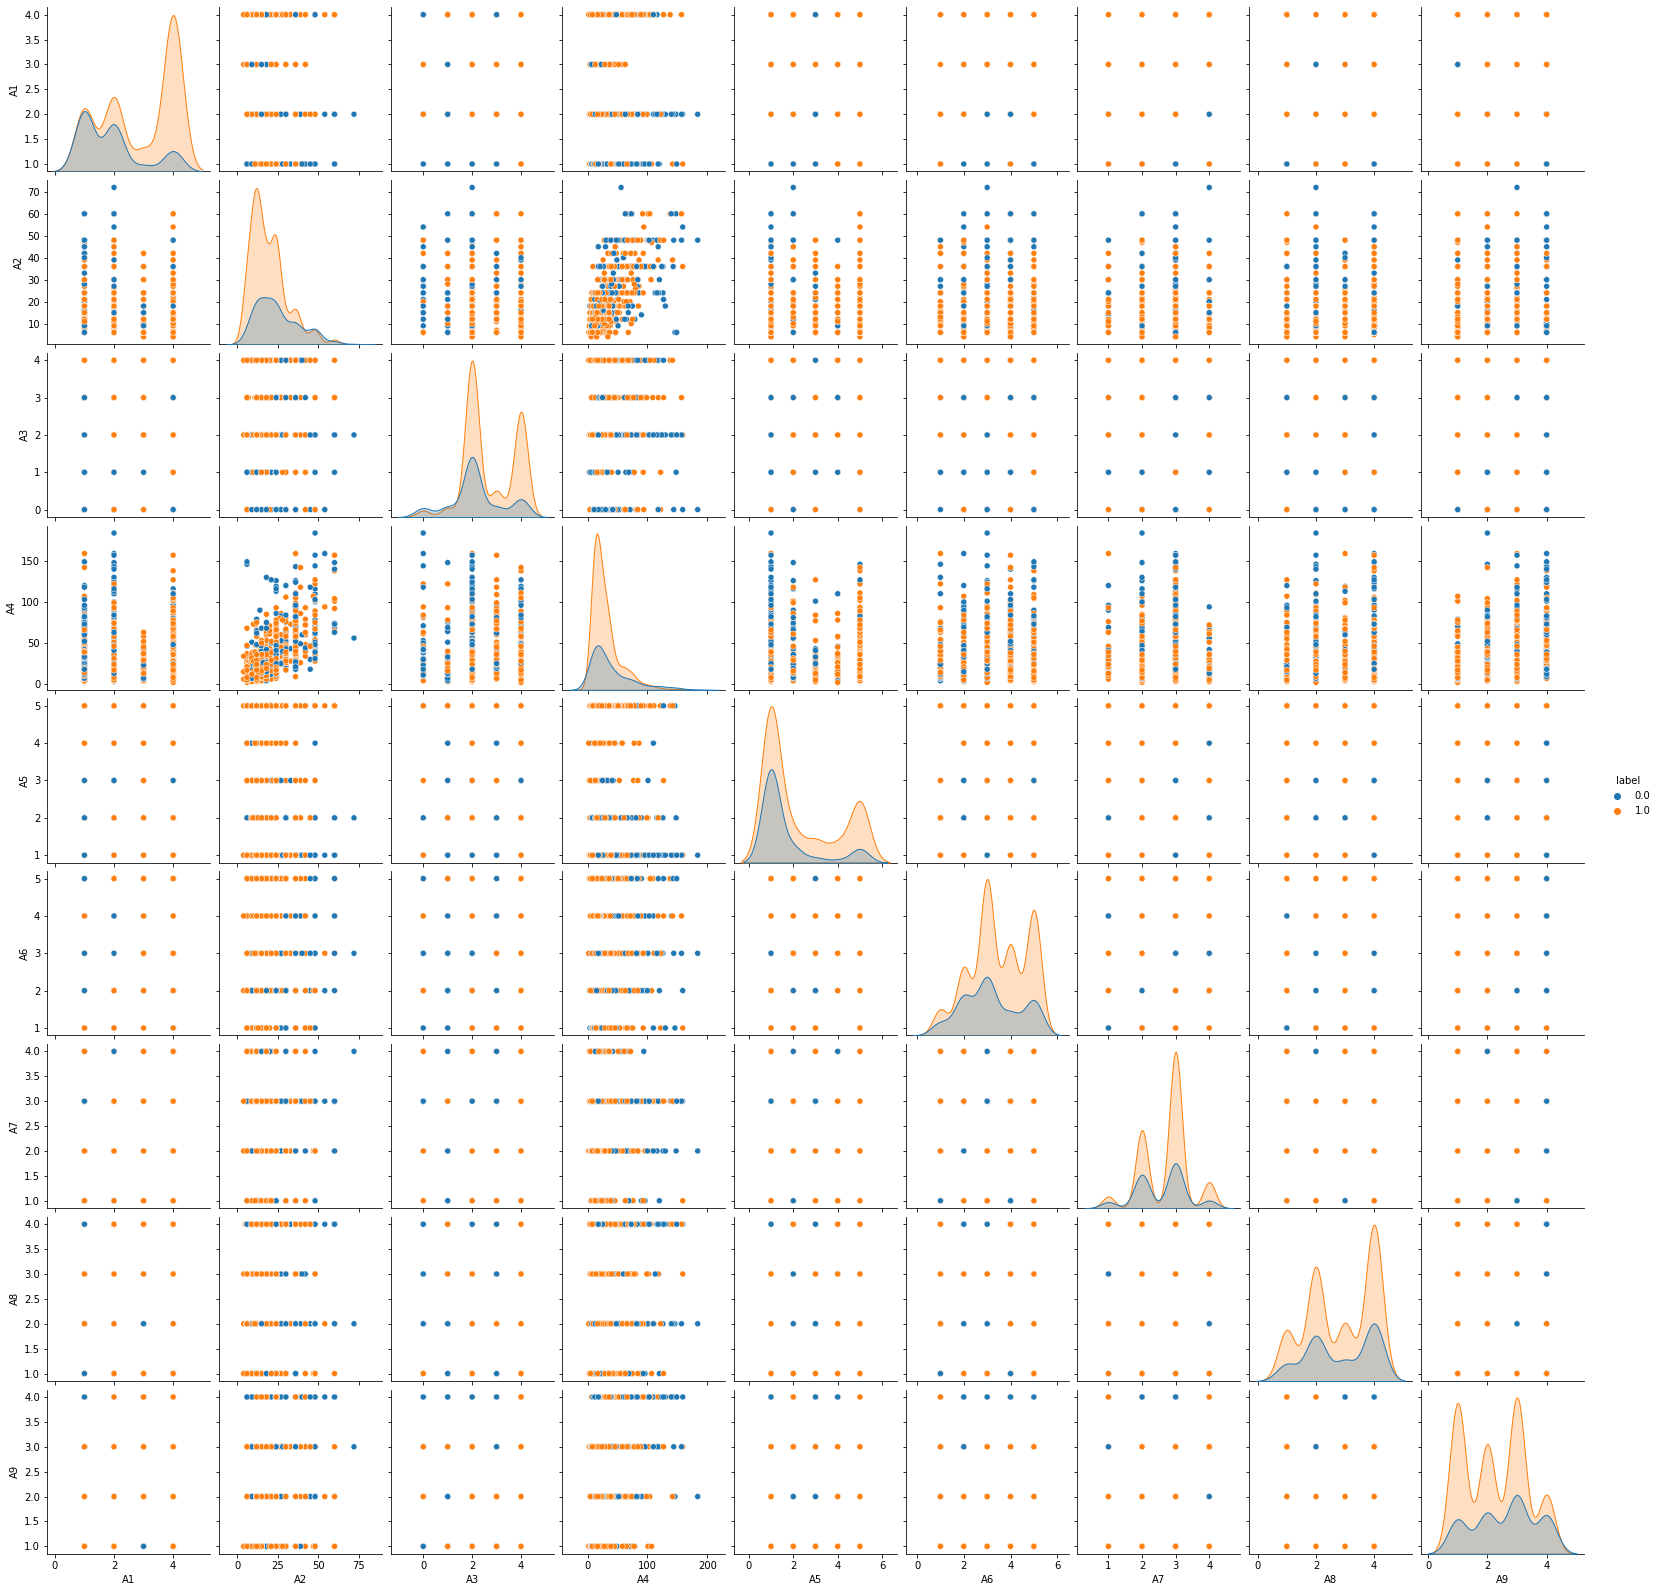

In [ ]:
# sns.pairplot(data_frame, 
#              hue='label', 
#              vars=['A'+str(i) for i in range(1, 10)])

sns.pairplot(data_frame,
             hue='label',
             vars=['A'+str(i) for i in range(1,10)])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


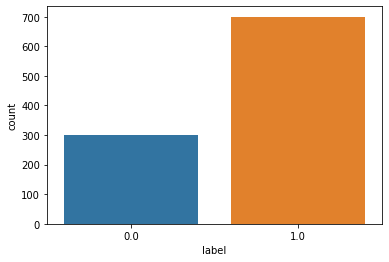

In [ ]:
# sns.countplot(data_frame['label'])
sns.countplot(data_frame['label'])

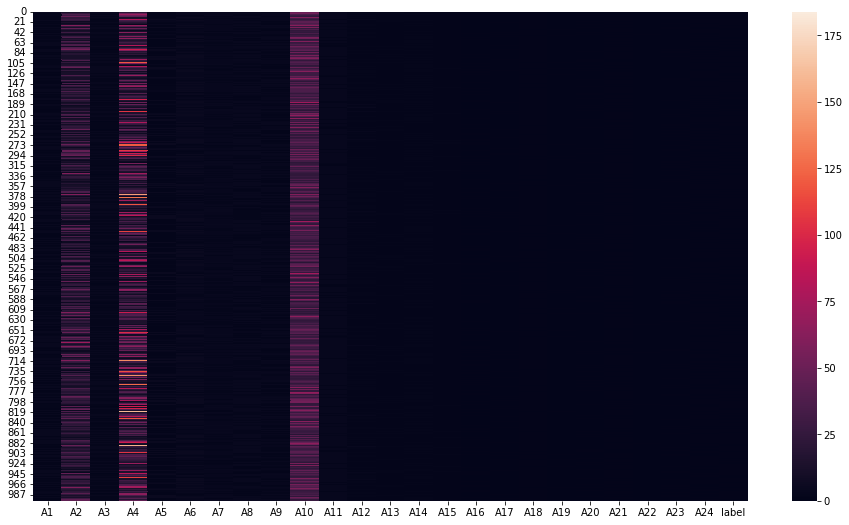

In [ ]:
# plt.figure(figsize=(16,9))
# sns.heatmap(data_frame)

plt.figure(figsize=(16,9))
sns.heatmap(data_frame)

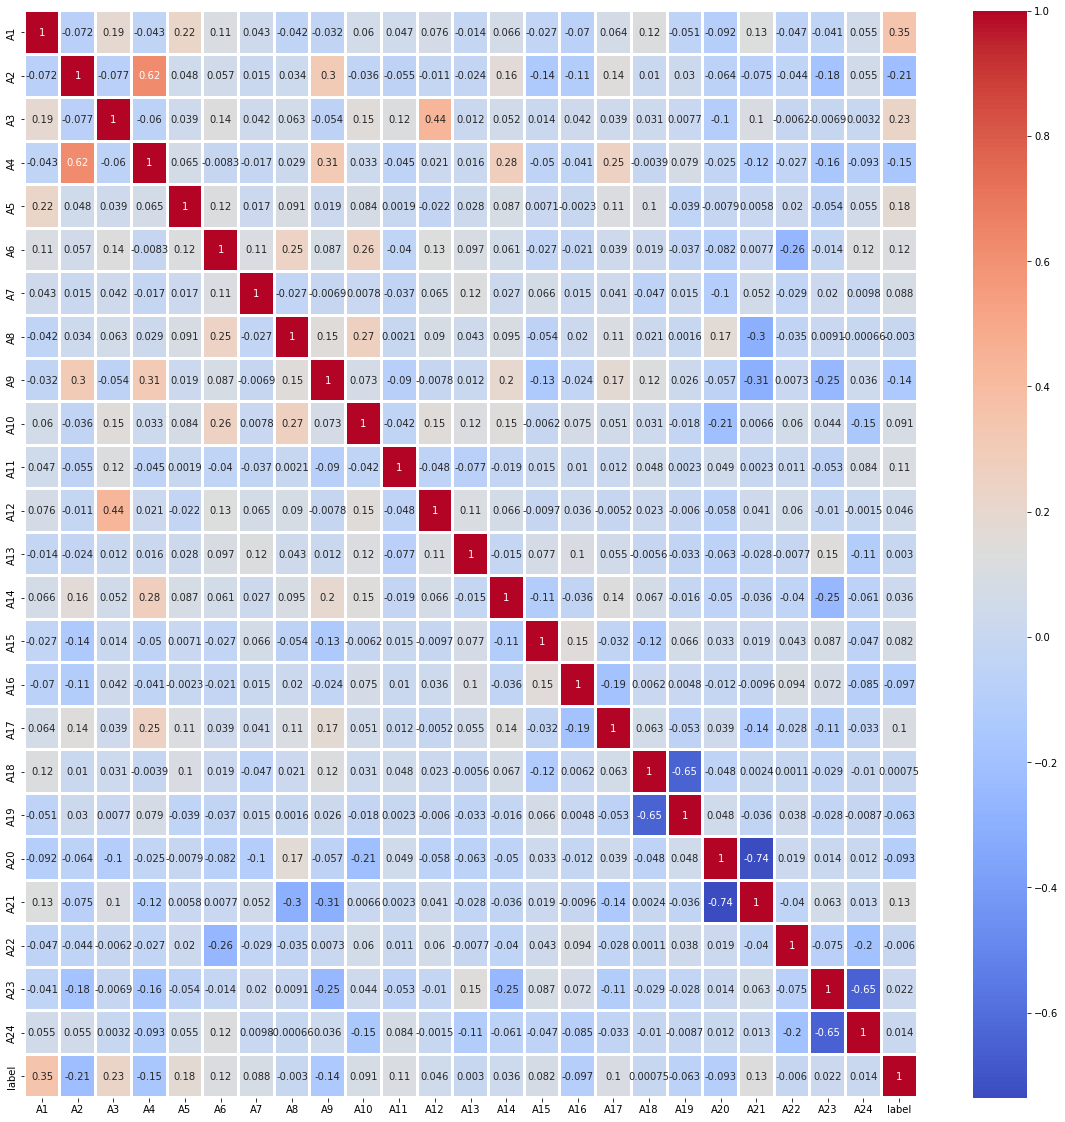

In [ ]:
# plt.figure(figsize=(20,20))
# sns.heatmap(data_frame.corr(), annot=True, cmap='coolwarm', linewidths=2)

plt.figure(figsize=(20,20))
sns.heatmap(data_frame.corr(), annot=True, cmap='coolwarm', linewidths=2)

# ***Data preprocessing***

***Normalization***

In [6]:
# X = data_frame.drop(['label'], axis=1)
# # X = (X-X.mean())/X.var()
# X = (X-X.min())/(X.max()-X.min())
# X

X = data_frame.drop(['label'], axis=1)
X = (X-X.min())/(X.max()-X.min())
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
0,0.000000,0.029412,1.00,0.054945,1.00,1.00,0.666667,1.000000,0.000000,0.857143,1.0,0.333333,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.333333,0.647059,0.50,0.318681,0.00,0.50,0.333333,0.333333,0.000000,0.053571,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.000000,0.117647,1.00,0.104396,0.00,0.75,0.666667,0.666667,0.000000,0.535714,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000000,0.558824,0.50,0.423077,0.00,0.75,0.666667,1.000000,0.333333,0.464286,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.294118,0.75,0.258242,0.00,0.50,0.666667,1.000000,1.000000,0.607143,1.0,0.333333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.082418,0.00,0.75,0.333333,1.000000,0.000000,0.214286,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.000000,0.382353,0.50,0.203297,0.00,0.50,0.000000,1.000000,0.333333,0.375000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,1.000000,0.117647,0.50,0.032967,0.00,1.00,0.666667,1.000000,0.666667,0.339286,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,0.000000,0.602941,0.50,0.087912,0.00,0.50,0.666667,1.000000,1.000000,0.071429,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# X.describe()

X.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,0.525667,0.248574,0.63625,0.168742,0.276250,0.596000,0.560667,0.615000,0.452667,0.295464,0.837500,0.135667,0.155000,0.404000,0.037000,0.234000,0.103000,0.907000,0.041000,0.179000,0.713000,0.022000,0.2000,0.630000
std,0.419213,0.177336,0.27078,0.155234,0.395006,0.302077,0.236027,0.367906,0.350070,0.203133,0.352801,0.192551,0.362086,0.490943,0.188856,0.423584,0.304111,0.290578,0.198389,0.383544,0.452588,0.146757,0.4002,0.483046
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.000000,0.117647,0.50000,0.065934,0.000000,0.500000,0.333333,0.333333,0.000000,0.142857,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
50%,0.333333,0.205882,0.50000,0.115385,0.000000,0.500000,0.666667,0.666667,0.333333,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000
75%,1.000000,0.294118,1.00000,0.208791,0.500000,1.000000,0.666667,1.000000,0.666667,0.410714,1.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000


<AxesSubplot:>

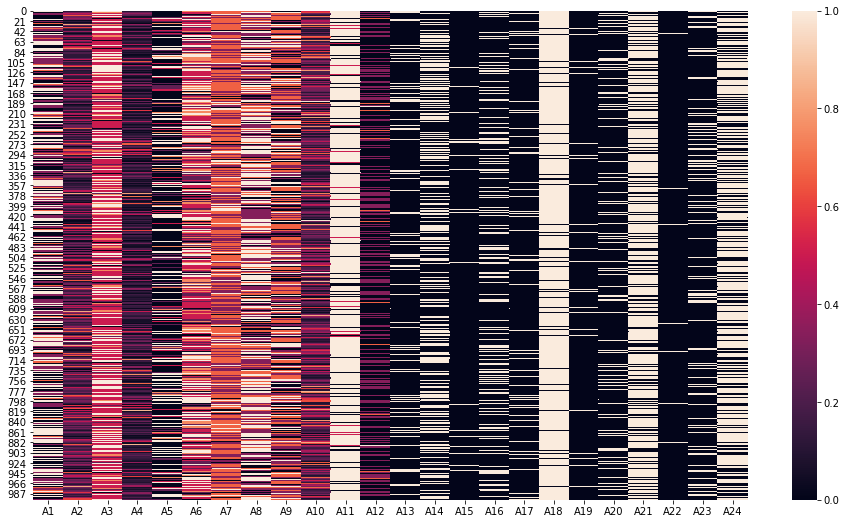

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(X)

plt.figure(figsize=(16,9))
sns.heatmap(X)

In [7]:
# y = data_frame['label']
# y

y = data_frame['label']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
995    1.0
996    1.0
997    1.0
998    0.0
999    1.0
Name: label, Length: 1000, dtype: float64

## Chia dữ liệu làm 2 phần training và testing 

- Training chiếm 80 % dữ liệu 
- Testing chiếm 20 % dữ liệu 

In [8]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# print("Dữ liệu training = ", X_train.shape, y_train.shape)
# print("Dữ liệu testing = ", X_test.shape, y_test.shape)

from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print(" Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (800, 24) (800,)
 Dữ liệu testing =  (200, 24) (200,)


In [9]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

# %matplotlib inline

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# ***K - Nearest Neightbor Classifier***

## Bài toán phân loại sử dụng KNN 

Mục tiêu: 

- Xây dựng được mô hình KNN sử dụng thư viện sklearn. 
- Ứng dụng, hiểu cách áp dụng mô hình KNN vào giải quyết bài toán thực tế (vd: phân loại) 
- Sử dụng độ đo Accuracy, Cost để làm độ đo đánh giá chất lượng mô hình. 

Vấn đề: 
- Có một tập các dữ liệu không có nhãn, làm sao để biết dữ liệu này là thuộc về nhãn nào.
- => Xây dựng mô hình học máy có thể phân loại.  

Dữ liệu: 
- Dữ liệu Bank Personal Loan Modelling
- Xem thêm: https://www.kaggle.com/teertha/personal-loan-modeling

Bài toán: 
- Input: 1 mẫu dữ liệu $X = [x_1, x_2, ... x_n]$
- Output: nhãn $y$ là 0 hoặc 1 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

## Mô hình KNN
Sử dụng thư viện sklearn để xây dựng mô hình
- `KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)`
- Số láng giềng: n_neighbors = 5
- Độ đo khoảng cách: Euclide p = 2

In [11]:
# knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
# knn_classifier.fit(X_train, y_train)

knn_classifier = KNeighborsClassifier(n_neighbors= 10, metric ='minkowski', p=2, weights= 'distance')
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Testing KNN model

## Đánh giá theo các độ đo

In [12]:
# def cost(y_true, y_pred):
#     true_pos = ((y_true==y_pred)&(y_true==1.0))*0.0
#     true_ne = ((y_true==y_pred)&(y_true==0.0))*0.0
#     false_ne = ((y_true!=y_pred)&(y_true==1.0))*1.0
#     false_pos = ((y_true!=y_pred)&(y_true==0.0))*5.0
#     return sum(true_pos + true_ne + false_pos + false_ne)/len(y_true)

def cost(y_true, y_pred):
    true_pos = ((y_true==y_pred)&(y_true==1.0))**0.0
    true_ne = ((y_true==y_pred)&(y_true==0.0))*0.0
    false_ne = ((y_true!=y_pred)&(y_true==1.0))*1.0
    false_pos = ((y_true!=y_pred)&(y_true==0.0))*5.0
    return sum(true_pos + true_ne + false_pos +false_ne)/len(y_true)

In [13]:
# from sklearn.metrics import precision_score, recall_score, accuracy_score

# print("Testing...\n")
# y_pred_knn = knn_classifier.predict(X_test)
# print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
# print('Cost: ', cost(y_test, y_pred_knn))
# print('Precision: ', precision_score(y_test, y_pred_knn))
# print('Recall: ', recall_score(y_test, y_pred_knn))

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Testing...\n")
y_pred_knn = knn_classifier.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Cost: ', cost(y_test, y_pred_knn))

Testing...

Accuracy:  0.76
Cost:  1.86


## Lựa chọn mô hình

### Lựa chọn số lượng láng giềng
- Thay đổi số lượng láng riềng tìm giá trị cho kết quả phân loại tốt nhất

In [14]:
# X = data_frame.drop(['label'], axis=1)
# X = (X-X.min())/(X.max()-X.min())
# y = data_frame['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X= data_frame.drop(['label'], axis=1)
X =(X-X.min())/(X.max()-X.min())
y = data_frame['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [15]:
# Định nghĩa các giá trị số lượng làng giềng xem xét
# n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 18, 20, 22, 25, 30]
# models = []
# for k in n_neighbors:
#     knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2, weights = 'distance')
#     knn_classifier.fit(X_train, y_train)
#     models.append(knn_classifier)
n_neighbors = [1,2,3,4,5,6,7,8,9,10,15,18,20,22,25,30]
models = []
for k in n_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors= k, metric= 'minkowski', p=2, weights='distance') 
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)
            

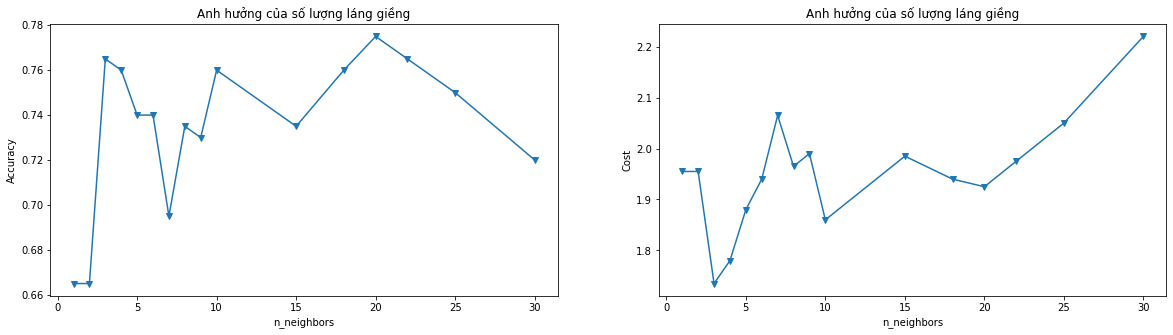

In [16]:
# Visualize sự tác động của việc lựa chọn láng giếng lên hiệu năng mô hình trên độ đo Accuracy
# acc, pre, re = [], [], []
# c = []
# for model in models:
#     y_pred = model.predict(X_test)
#     acc.append(accuracy_score(y_test, y_pred))
#     c.append(cost(y_test, y_pred))
#     pre.append(precision_score(y_test, y_pred))
#     re.append(recall_score(y_test, y_pred))

acc, pre, re = [], [],[]
c =[]
for model in models:
  y_pred = model.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  c.append(cost(y_test, y_pred))

# Visualize
# fig, axs = plt.subplots(1, 2, figsize = (20, 5))

# axs[0].plot(n_neighbors, acc, marker= "v")
# axs[0].set_xlabel("n_neighbors")
# axs[0].set_ylabel("Accuracy")
# axs[0].set_title("Ảnh hưởng của số lượng láng giềng")

# axs[1].plot(n_neighbors, c, marker= "v")
# axs[1].set_xlabel("n_neighbors")
# axs[1].set_ylabel("Cost")
# axs[1].set_title("Ảnh hưởng của số lượng láng giềng")

fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot( n_neighbors, acc, marker="v")
axs[0].set_xlabel("n_neighbors")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Anh hưởng của số lượng láng giềng")                        

axs[1].plot(n_neighbors, c, marker="v")
axs[1].set_xlabel("n_neighbors")
axs[1].set_ylabel("Cost")
axs[1].set_title("Anh hưởng của số lượng láng giềng")
# axs[1].plot(n_neighbors, pre, marker= "v")
# axs[1].set_xlabel("n_neighbors")
# axs[1].set_ylabel("Precision")
# axs[1].set_title("Ảnh hưởng của số lượng láng giềng")

# axs[2].plot(n_neighbors, re, marker= "v")
# axs[2].set_xlabel("n_neighbors")
# axs[2].set_ylabel("Recall")
# axs[2].set_title("Ảnh hưởng của số lượng láng giềng")

plt.show()

### Lựa chọn hàm tính khoảng cách
- Hàm tính khoảng cách: minkowski, manhattan, euclidean, chebyshev
- Hàm tính khoảng cách nào là tốt nhất cho bài toán này ?

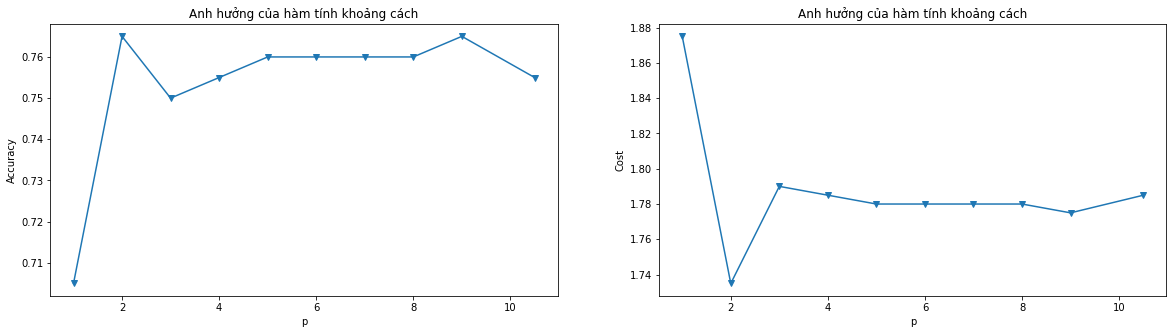

In [17]:
# k = 3
# models = []

# ps = [1,2,3,4,5,6,7,8,9,10,50, 'inf']   
# for p in ps:
#     if p == 'inf':
#         metric = 'chebyshev'
#         p = 2
#     else:
#         metric = 'minkowski'
#     knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = metric, p = p, weights = 'distance')
#     knn_classifier.fit(X_train, y_train)
#     models.append(knn_classifier)

k = 3

models = []
ps = [1,2,3,4,5,6,7,8,9,10.50]
for p in ps:
    if p == 'inf':
      metric ='chebyshev'
      p = 2
    else:
      metric = 'minkowski'
    knn_classifier = KNeighborsClassifier(n_neighbors= k, metric= metric, p = p, weights= 'distance')
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)


# acc, pre, re = [], [], []
# c = []
# for model in models:
#     y_pred = model.predict(X_test)
#     acc.append(accuracy_score(y_test, y_pred))
#     c.append(cost(y_test, y_pred))
#     pre.append(precision_score(y_test, y_pred))
#     re.append(recall_score(y_test, y_pred))


acc, pre, re = [], [], []
c = []
for model in models:
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    c.append(cost(y_test, y_pred))
# Visualize
# fig, axs = plt.subplots(1, 2, figsize = (20, 5))

# axs[0].plot(ps, acc, marker= "v")
# axs[0].set_xlabel("p")
# axs[0].set_ylabel("Accuracy")
# axs[0].set_title("Ảnh hưởng của hàm tính khoảng cách")

# axs[1].plot(ps, c, marker= "v")
# axs[1].set_xlabel("p")
# axs[1].set_ylabel("Cost")
# axs[1].set_title("Ảnh hưởng của hàm tính khoảng cách")


fig, axs = plt.subplots(1, 2, figsize =(20, 5))

axs[0].plot(ps, acc, marker = "v")
axs[0].set_xlabel("p")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Anh hưởng của hàm tính khoảng cách")

axs[1].plot(ps, c, marker ="v" )
axs[1].set_xlabel("p")
axs[1].set_ylabel("Cost")
axs[1].set_title("Anh hưởng của hàm tính khoảng cách")
# axs[1].plot(ps, pre, marker= "v")
# axs[1].set_xlabel("p")
# axs[1].set_ylabel("Precision")
# axs[1].set_title("Ảnh hưởng của hàm tính khoảng cách")

# axs[2].plot(ps, re, marker= "v")
# axs[2].set_xlabel("p")
# axs[2].set_ylabel("Recall")
# axs[2].set_title("Ảnh hưởng của hàm tính khoảng cách")

plt.show()

### Lựa chọn thuộc tính
- Các thuộc tính: A1-24
- Thử loại bỏ từng thuộc tính ra khỏi dữ liệu xem chúng ảnh hưởng như thế nào tới kết quả phân loại.
- Các thuộc tính nào nên được sử dụng để cho kết quả phân loại tốt nhất ?

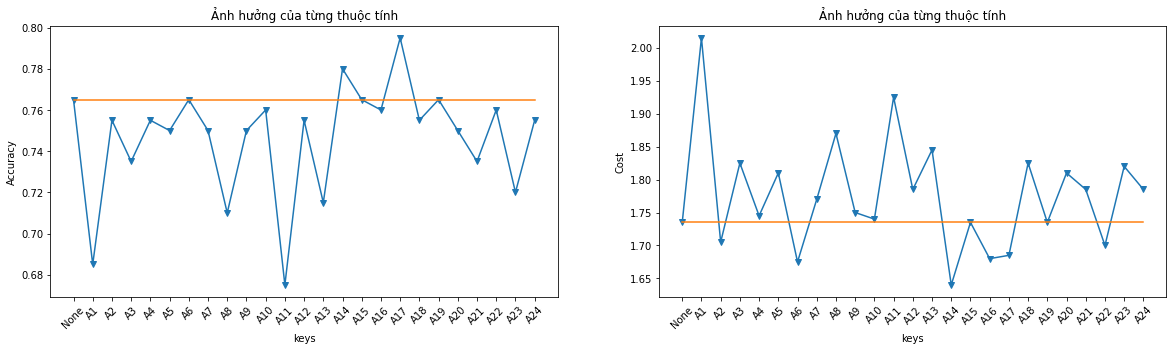

(array([ 2,  6, 14, 16, 17, 22]),)
(array([14, 17]),)


In [20]:
# models = []
# acc, pre, re = [], [], []
# c = []
# keys = ['None'] + ['A'+str(i) for i in range(1, 25)]
# for key in keys:
#     if key == 'None':
#         X = data_frame.drop(['label'], axis=1)
#     else:
#         X = data_frame.drop(['label', key], axis=1)
#     X = (X-X.min())/(X.max()-X.min())
#     y = data_frame['label']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
#     knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2, weights = 'distance')
#     knn_classifier.fit(X_train, y_train)
#     y_pred = knn_classifier.predict(X_test)
#     acc.append(accuracy_score(y_test, y_pred))
#     c.append(cost(y_test, y_pred))
models = []
acc, pre, re = [], [], []
c = []
keys = ['None'] + ['A'+str(i) for i in range(1, 25)]
for key in keys:
    if key == 'None':
        X = data_frame.drop(['label'], axis=1)
    else:
        X = data_frame.drop(['label', key], axis =1)
    X  =(X-X.min())/(X.max()-X.min())
    y = data_frame['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    knn_classifier = KNeighborsClassifier(n_neighbors= 3, metric = 'minkowski', p=2, weights= 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    c.append(cost(y_test, y_pred))


#     pre.append(precision_score(y_test, y_pred))
#     re.append(recall_score(y_test, y_pred))
    

# Visualize
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

axs[0].plot(keys, acc, marker= "v")
axs[0].set_xlabel("keys")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của từng thuộc tính")
axs[0].plot(keys, [acc[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[0].set_xticklabels(keys, rotation=45)

axs[1].plot(keys, c, marker= "v")
axs[1].set_xlabel("keys")
axs[1].set_ylabel("Cost")
axs[1].set_title("Ảnh hưởng của từng thuộc tính")
axs[1].plot(keys, [c[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[1].set_xticklabels(keys, rotation=45)
    
# axs[1].plot(keys, re, marker= "v")
# axs[1].set_xlabel("keys")
# axs[1].set_ylabel("Recall")
# # axs[1].set_title("Ảnh hưởng của hàm tính khoảng cách")
# axs[1].plot(keys, [re[0] for _ in range(len(re))], marker = '', label = 'Baseline')
# axs[1].set_xticklabels(keys, rotation=45)
    
# axs[2].plot(keys, pre, marker= "v")
# axs[2].set_xlabel("keys")
# axs[2].set_ylabel("Precision")
# # axs[2].set_title("Ảnh hưởng của hàm tính khoảng cách")
# axs[2].plot(keys, [pre[0] for _ in range(len(pre))], marker = '', label = 'Baseline')
# axs[2].set_xticklabels(keys, rotation=45)

plt.show()

c = np.array(c)
print(np.where(c<c[0]))

acc = np.array(acc)
print(np.where(acc>acc[0]))